In [1]:
import base64
from glob import glob
import os.path
import tempfile

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import yaml

from IPython.display import Image, SVG, HTML, display

plt.style.use('fivethirtyeight')

In [2]:
DEGREE_BINS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
            
def render_stats(data, filename=""):
    html = ["<table width=100%>"]
    html.append("<caption>{0}</caption>".format(filename))

    for k in data['motifs']:
        for pos, count in enumerate(data['motifs'][k][1]):
            html.append("<tr>")
            with open("../outputs/stats/motifs/{0}.{1}.png".format(k, pos), 'rb') as f:
                html.append("""<td width=100px><img src="data:image/png;base64,{0}"></td>""".format(
                        base64.b64encode(f.read()).decode("ascii")))
            html.append("<td>{0}</td>".format(count))
            html.append("</tr>")
    html.append("</table>")
    return ''.join(html)

def genome_id(filename):
    return os.path.splitext(os.path.basename(filename))[0]

## Graph size before compression

In [4]:
props = {
    "degree_distribution": {},
    "average_degree": {},
    "edges": {},
    "nodes": {},
    'counts': {},
    'unique_kmers': {}
}

BINS = None

for info in glob("../outputs/stats/31/invertebrate/*.info"):
    with open(info, 'r') as f:
        data = yaml.load(f)
        for k in data:
            if k == 'linear_paths':
                props['counts'][genome_id(info)] = data['linear_paths']['counts']
                if BINS is None:
                    BINS = data['linear_paths']['bins']
            elif k == "degree_distribution":
                # TODO: degree distribution has size > 9 sometimes, why?
                props[k][genome_id(info)] = data[k][:9]
            elif k in props:
                props[k][genome_id(info)] = data[k]
all_invertebrates = pd.DataFrame(props)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c0c162e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f58babe86a0>]], dtype=object)

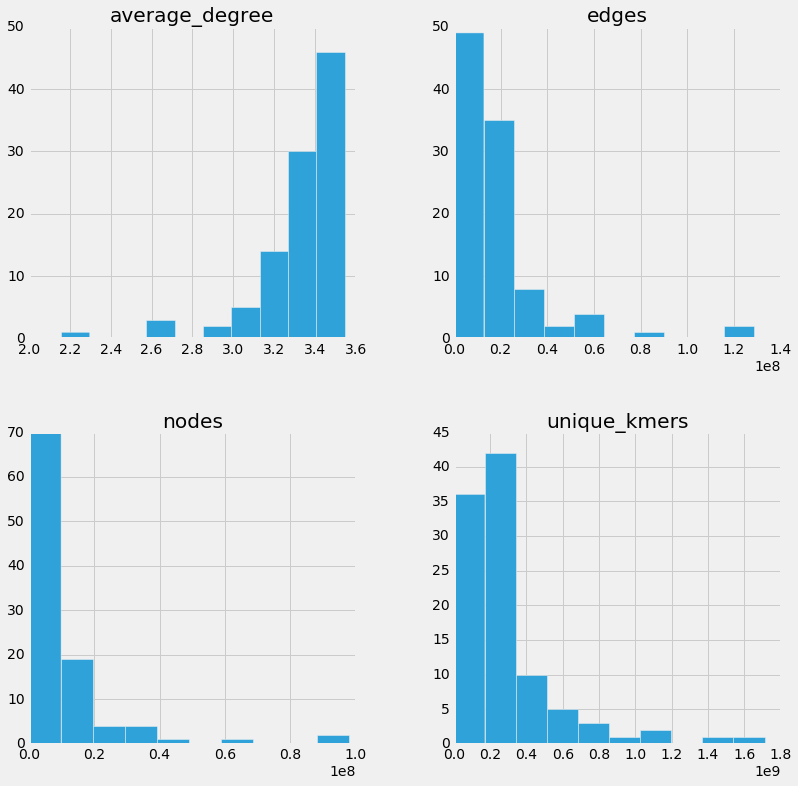

In [5]:
all_invertebrates.hist(layout=(2,2), figsize=(12,12))

In [6]:
all_invertebrates['unique_kmers'].argmax()

'GCF_001194135.1_Octopus_bimaculoides_v2_0_genomic'

In [7]:
all_invertebrates['unique_kmers'].argmin()

'GCF_001186385.1_Dnoxia_1.0_genomic'

In [8]:
all_invertebrates['unique_kmers'].describe()

count    1.010000e+02
mean     2.902730e+08
std      2.873346e+08
min      4.858090e+05
25%      1.340164e+08
50%      2.171791e+08
75%      3.192394e+08
max      1.711404e+09
Name: unique_kmers, dtype: float64

In [9]:
all_invertebrates['nodes'].describe()

count    1.010000e+02
mean     1.167112e+07
std      1.526313e+07
min      4.020400e+04
25%      4.836420e+06
50%      7.742464e+06
75%      1.164492e+07
max      9.801448e+07
Name: nodes, dtype: float64

In [10]:
all_invertebrates['nodes'].sort_values(ascending=False).head()

GCF_000517525.1_Limulus_polyphemus-2.1.2_genomic     98014477
GCF_001194135.1_Octopus_bimaculoides_v2_0_genomic    93063677
GCF_000208615.1_JCVI_ISG_i3_1.0_genomic              62914696
GCF_000365465.1_Ptep_1.0_genomic                     42343232
GCF_000004015.3_AaegL2_genomic                       33935299
Name: nodes, dtype: int64

In [11]:
all_invertebrates['nodes'].sort_values().head()

GCF_000002195.4_Amel_4.5_cds_from_genomic                40204
GCF_000002865.3_V1.0_genomic                            355588
GCF_000151315.2_C_owczarzaki_V2_genomic                 481836
GCF_000388065.1_Font_alba_ATCC_38817_V2_genomic         851363
GCF_000188695.1_Proterospongia_sp_ATCC50818_genomic    1451901
Name: nodes, dtype: int64

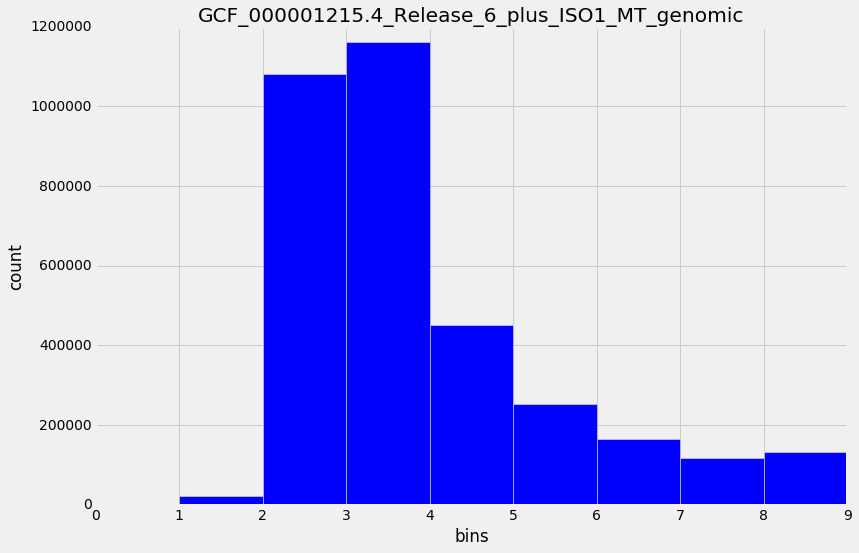

In [12]:
fig = plt.figure(figsize=(12,8))
width = DEGREE_BINS[1] - DEGREE_BINS[0]
plt.bar(DEGREE_BINS[:-1], all_invertebrates['degree_distribution'].iloc[0],
        width=width)
plt.title(all_invertebrates.iloc[0].name)
plt.xlabel("bins")
plt.ylabel("count")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

## Linear paths

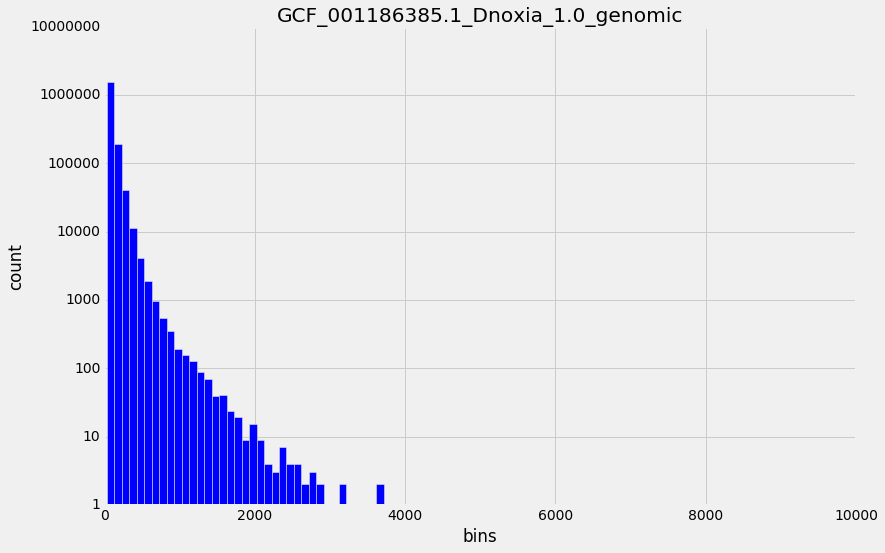

In [13]:
fig = plt.figure(figsize=(12,8))
width = BINS[1] - BINS[0]
plt.bar(BINS[:-1], all_invertebrates['counts']['GCF_001186385.1_Dnoxia_1.0_genomic'],
        log=True,
        width=width)
plt.title('GCF_001186385.1_Dnoxia_1.0_genomic')
plt.xlabel("bins")
plt.ylabel("count")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

In [14]:
all_invertebrates['linear_paths_length'] = all_invertebrates['counts'].apply(sum)

In [15]:
all_invertebrates['linear_paths_length'].describe()

count    1.010000e+02
mean     1.802136e+06
std      2.002271e+06
min      1.445200e+04
25%      7.848350e+05
50%      1.237440e+06
75%      1.869183e+06
max      1.190195e+07
Name: linear_paths_length, dtype: float64

In [16]:
all_invertebrates['linear_paths_length'].sort_values(ascending=False).head()

GCF_001194135.1_Octopus_bimaculoides_v2_0_genomic    11901951
GCF_000517525.1_Limulus_polyphemus-2.1.2_genomic     11613244
GCF_000208615.1_JCVI_ISG_i3_1.0_genomic               9165019
GCF_000365465.1_Ptep_1.0_genomic                      6637935
GCF_000696795.1_Hhal_1.0_genomic                      5419884
Name: linear_paths_length, dtype: int64

In [17]:
all_invertebrates['linear_paths_length'].sort_values(ascending=True).head()

GCF_000002195.4_Amel_4.5_cds_from_genomic               14452
GCF_000002865.3_V1.0_genomic                            69347
GCF_000151315.2_C_owczarzaki_V2_genomic                 93414
GCF_000388065.1_Font_alba_ATCC_38817_V2_genomic        162100
GCF_000188695.1_Proterospongia_sp_ATCC50818_genomic    272292
Name: linear_paths_length, dtype: int64

In [18]:
compress_ratio = all_invertebrates['nodes'] / all_invertebrates['unique_kmers']

In [19]:
compress_ratio.sort_values(ascending=False).head()

GCF_001186385.1_Dnoxia_1.0_genomic     20.024783
GCF_001465965.1_Pdom_r1.2_genomic       6.672336
GCF_001313835.1_ASM131383v1_genomic     0.928635
GCF_001263575.1_Nlec1.0_genomic         0.689383
GCF_000002995.3_ASM299v2_genomic        0.190834
dtype: float64

In [20]:
compress_ratio.sort_values(ascending=True).head()

GCF_000002195.4_Amel_4.5_cds_from_genomic        0.002303
GCF_000002865.3_V1.0_genomic                     0.009761
GCF_000151315.2_C_owczarzaki_V2_genomic          0.018574
GCF_000255335.1_Mocc_1.0_genomic                 0.020853
GCF_001186125.1_Spha_arctica_JP610_V1_genomic    0.022604
dtype: float64